Project Goals

Project Description

Initial Hypothesis

Project Planning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import explore as ex
import evaluate as ev

In [2]:
import warnings
warnings.filterwarnings("ignore")

Acquire

In [3]:
zillow = w.acquire_zillow()

In [4]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,2.0,2.0,1279.0,184541.0,1980.0,6059.0
1,2.0,2.0,2016.0,78654.0,1952.0,6037.0
2,3.0,2.0,1472.0,486700.0,1977.0,6059.0
3,2.0,1.0,936.0,466022.0,1972.0,6059.0
4,3.0,3.0,3412.0,850417.0,1979.0,6059.0


In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   taxvaluedollarcnt             52441 non-null  float64
 4   yearbuilt                     52326 non-null  float64
 5   fips                          52442 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


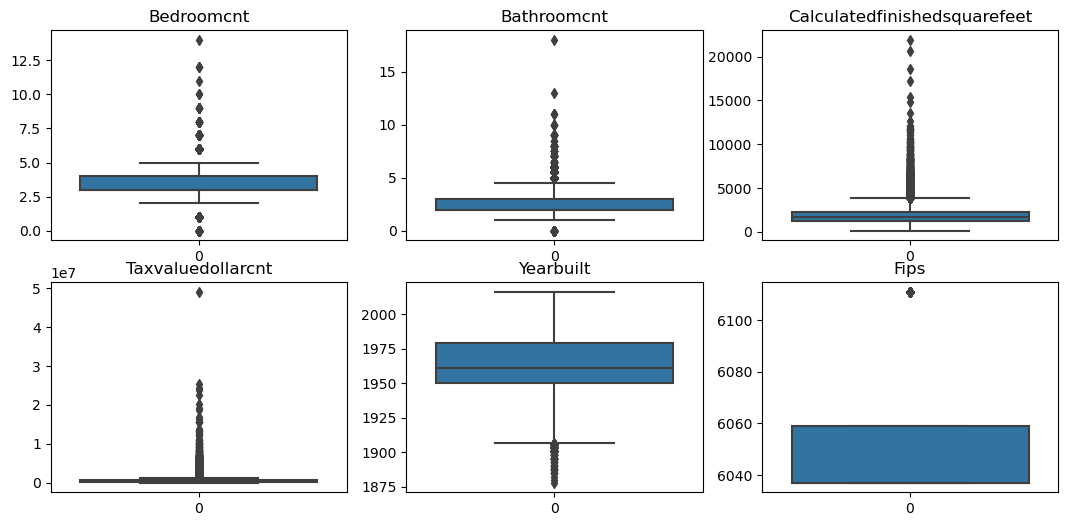

In [6]:
plt.figure(figsize=(13, 6))

for i, col in enumerate(zillow):
    plt.subplot(2, 3, i+1)
    plt.title(col.capitalize())
    sns.boxplot(data=zillow[col])
    
plt.show()

low limit = 695
high limit = 5500

Preparation

In [7]:
zillow.yearbuilt

0        1980.0
1        1952.0
2        1977.0
3        1972.0
4        1979.0
          ...  
52437    1966.0
52438    1952.0
52439    1979.0
52440    1914.0
52441    1966.0
Name: yearbuilt, Length: 52442, dtype: float64

In [8]:
zillow = w.prep_zillow(zillow)

In [9]:
zillow.head()

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
1,2,2.0,2016,78654,1952,6037.0
6,3,2.0,1770,93356,1950,6037.0
7,5,5.0,3434,947462,1966,6037.0
10,3,3.0,1737,275148,1938,6037.0
11,2,1.0,924,934030,1949,6037.0


In [10]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32683 entries, 1 to 52440
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    32683 non-null  int64  
 1   bathrooms   32683 non-null  float64
 2   sqft        32683 non-null  int64  
 3   prop_value  32683 non-null  int64  
 4   yearbuilt   32683 non-null  int64  
 5   fips        32683 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.7 MB


In [11]:
train, validate, test = w.split_data(zillow)

Explore

In [12]:
train.head()

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
677,4,2.0,1878,420242,1929,6037.0
16867,3,2.0,1217,187990,1954,6037.0
40857,4,3.0,1703,258961,1987,6037.0
21559,4,2.0,2002,1078443,1936,6037.0
43389,4,3.0,3045,638531,1967,6037.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19609 entries, 677 to 7594
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    19609 non-null  int64  
 1   bathrooms   19609 non-null  float64
 2   sqft        19609 non-null  int64  
 3   prop_value  19609 non-null  int64  
 4   yearbuilt   19609 non-null  int64  
 5   fips        19609 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.0 MB


In [14]:
train

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
677,4,2.0,1878,420242,1929,6037.0
16867,3,2.0,1217,187990,1954,6037.0
40857,4,3.0,1703,258961,1987,6037.0
21559,4,2.0,2002,1078443,1936,6037.0
43389,4,3.0,3045,638531,1967,6037.0
...,...,...,...,...,...,...
30017,3,2.0,1358,68088,1950,6037.0
9618,3,2.0,1341,67677,1956,6037.0
921,3,2.0,1176,69969,1954,6037.0
44302,2,1.0,966,39509,1947,6037.0


In [15]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'prop_value', 'yearbuilt', 'fips'], dtype='object')

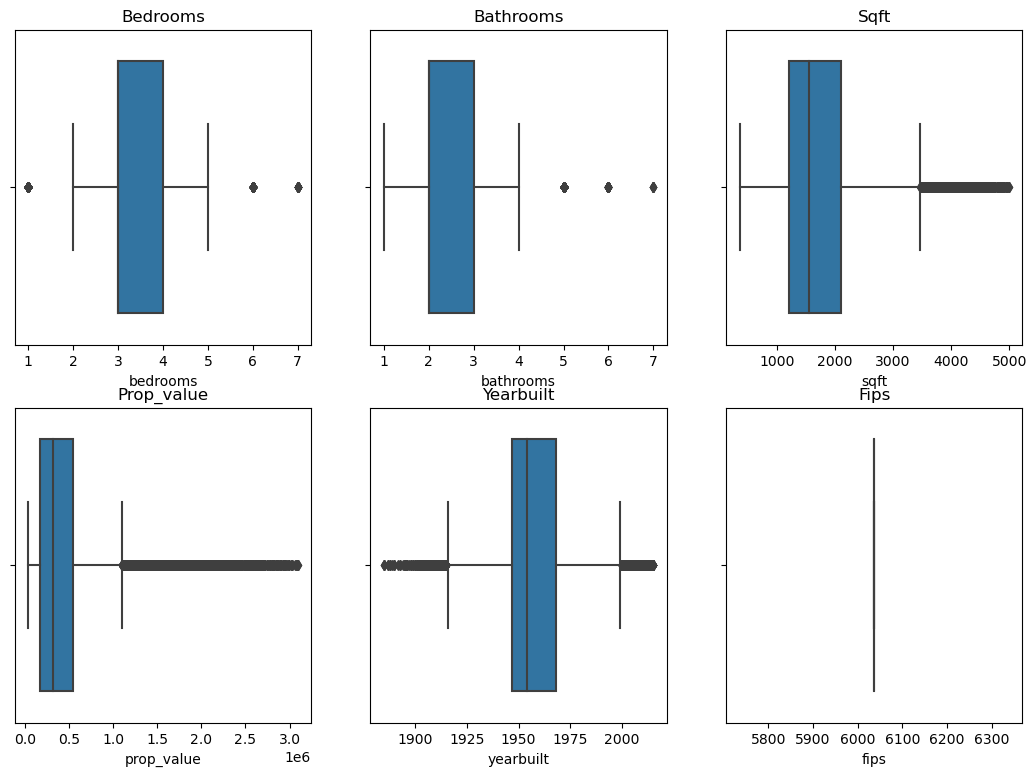

In [16]:
plt.figure(figsize=(13, 9))

for i, col in enumerate(train):
    plt.subplot(2, 3, i+1)
    plt.title(col.capitalize())
    sns.boxplot(x=train[col])
    
plt.show()

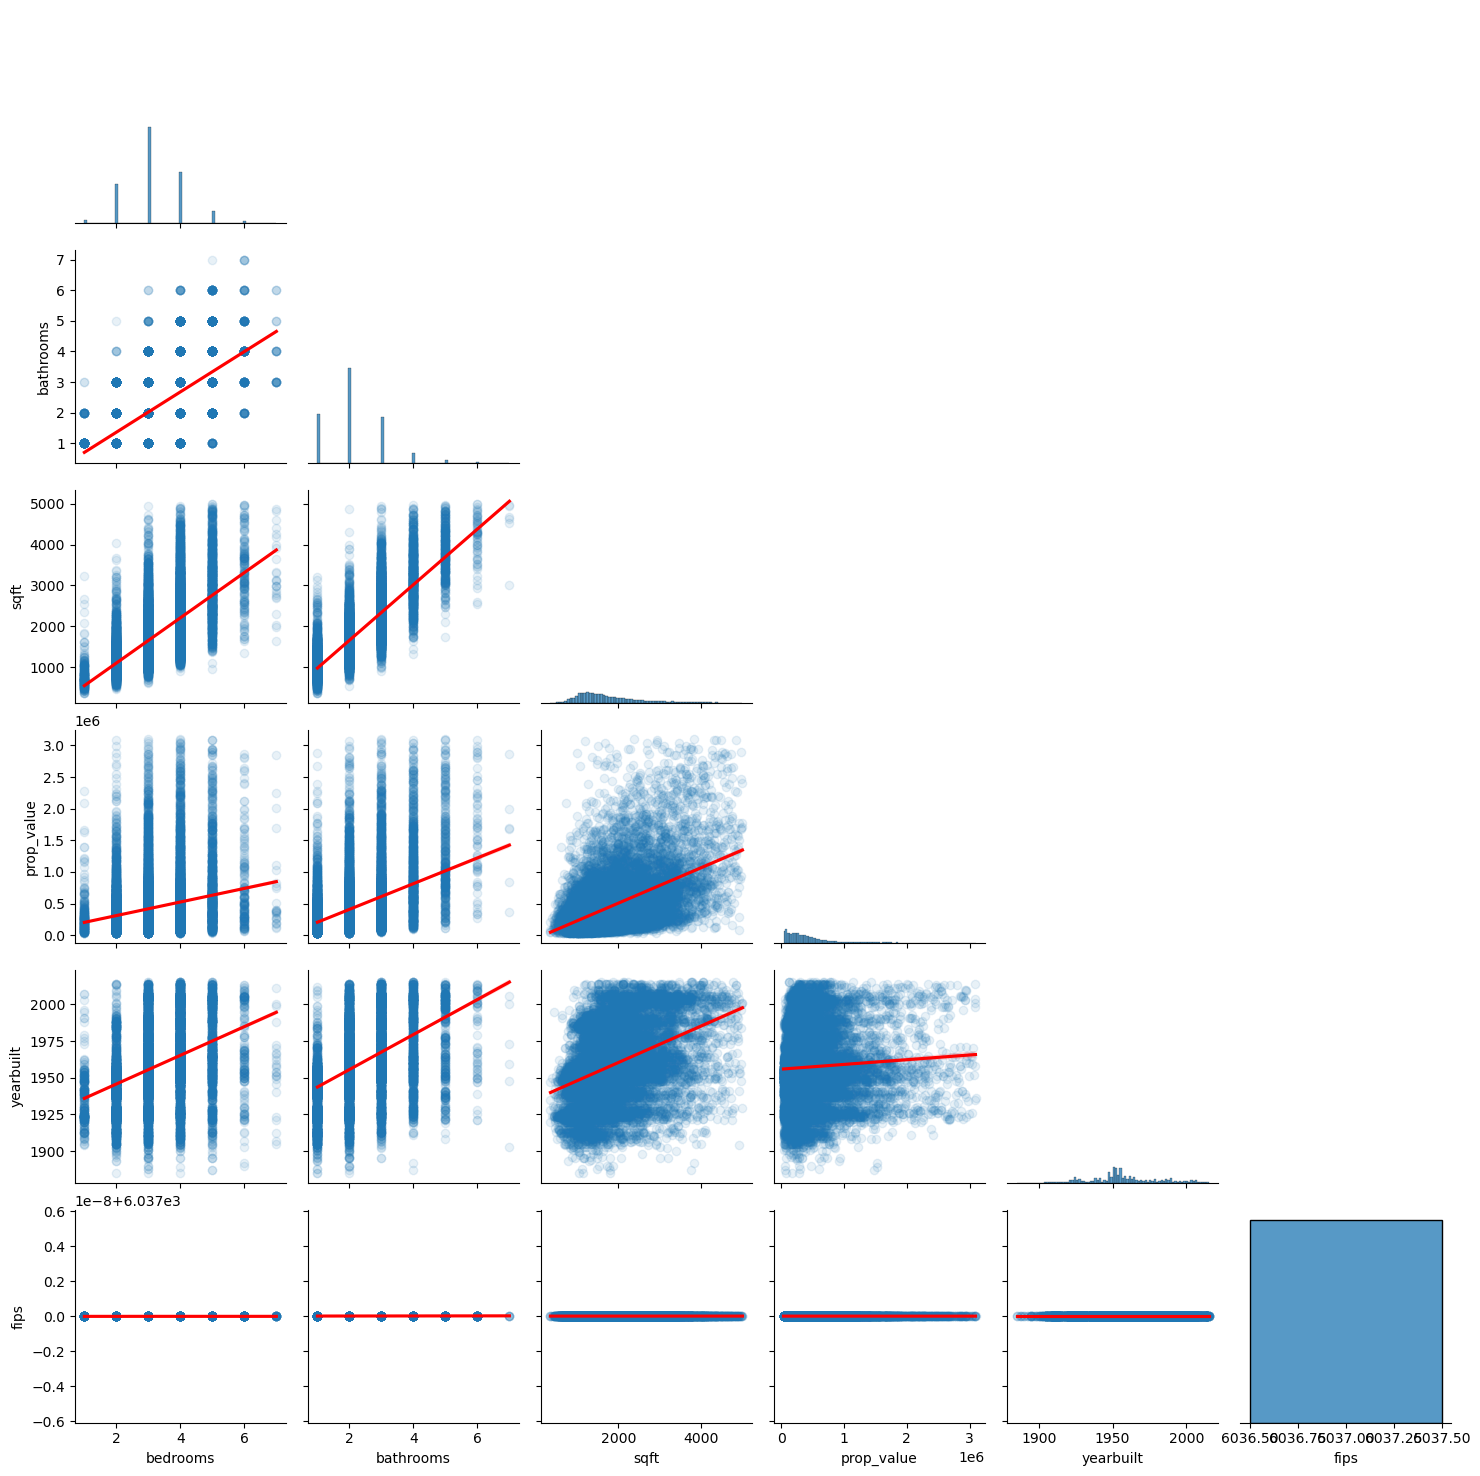

In [17]:
ex.plot_variable_pairs(train)

In [18]:
cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt']

train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test, cols)

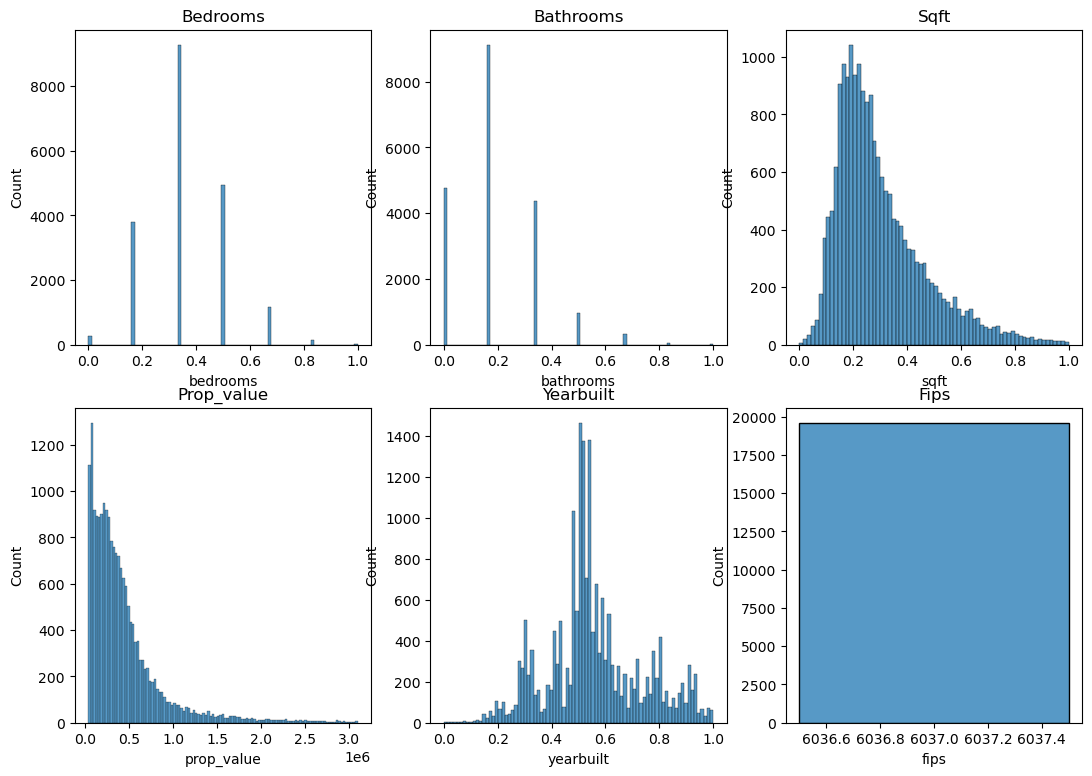

In [36]:
plt.figure(figsize=(13, 9))

for i, col in enumerate(train_scaled):
    plt.subplot(2, 3, i+1)
    plt.title(col.capitalize())
    sns.histplot(train_scaled[col])
    
plt.show()

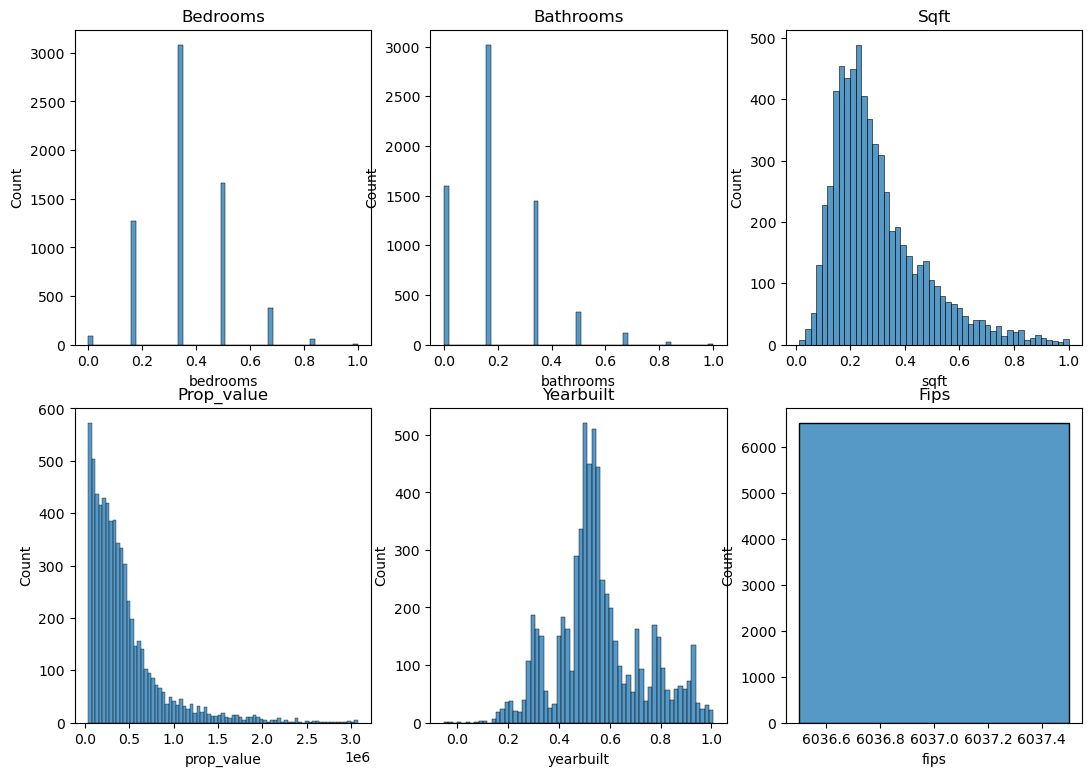

In [37]:
plt.figure(figsize=(13, 9))

for i, col in enumerate(validate_scaled):
    plt.subplot(2, 3, i+1)
    plt.title(col.capitalize())
    sns.histplot(validate_scaled[col])
    
plt.show()

In [38]:
train_scaled.prop_value.quantile(0.01)

43854.0

In [19]:
train_scaled

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
677,0.500000,0.166667,0.327579,420242,0.338462,6037.0
16867,0.333333,0.166667,0.184937,187990,0.530769,6037.0
40857,0.500000,0.333333,0.289814,258961,0.784615,6037.0
21559,0.500000,0.166667,0.354338,1078443,0.392308,6037.0
43389,0.500000,0.333333,0.579413,638531,0.630769,6037.0
...,...,...,...,...,...,...
30017,0.333333,0.166667,0.215365,68088,0.500000,6037.0
9618,0.333333,0.166667,0.211696,67677,0.546154,6037.0
921,0.333333,0.166667,0.176090,69969,0.530769,6037.0
44302,0.166667,0.000000,0.130773,39509,0.476923,6037.0


In [39]:
validate_scaled

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
44953,0.500000,0.333333,0.447562,1949849,0.723077,6037.0
37797,0.166667,0.000000,0.145231,86316,0.176923,6037.0
19633,0.000000,0.166667,0.144368,373144,0.176923,6037.0
19987,0.333333,0.000000,0.139189,137238,0.453846,6037.0
15109,0.000000,0.000000,0.083082,345554,0.438462,6037.0
...,...,...,...,...,...,...
29584,0.166667,0.000000,0.127751,91079,0.623077,6037.0
46459,0.500000,0.333333,0.573587,676156,0.576923,6037.0
28581,0.333333,0.166667,0.148899,644943,0.523077,6037.0
34173,0.333333,0.333333,0.245792,97502,0.792308,6037.0


In [20]:
train_scaled.corr()

,bedrooms,bathrooms,sqft,prop_value,yearbuilt,fips
bedrooms,1.000000,0.638051,0.648785,0.227400,0.384510,NaN
bathrooms,0.638051,1.000000,0.822664,0.443926,0.483503,NaN
sqft,0.648785,0.822664,1.000000,0.507297,0.418492,NaN
prop_value,0.227400,0.443926,0.507297,1.000000,0.059704,NaN
yearbuilt,0.384510,0.483503,0.418492,0.059704,1.000000,NaN
fips,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

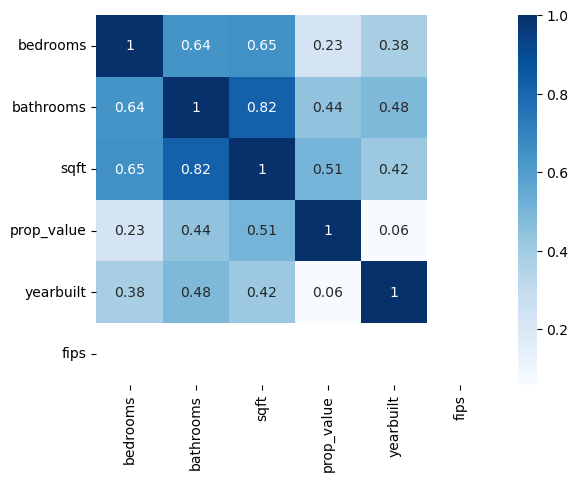

In [21]:
sns.heatmap(train_scaled.corr(), annot=True, cmap="Blues")

Model

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
rfe = RFE(LinearRegression(normalize=True), n_features_to_select=2)

In [32]:
rfe.fit(train_scaled[cols], train_scaled.prop_value)

RFE(estimator=LinearRegression(normalize=True), n_features_to_select=2)

In [33]:
train_scaled[cols].iloc[:, rfe.support_].columns.tolist()

['bedrooms', 'sqft']

In [26]:
#Establish baseline

train_scaled.prop_value.mean()

436141.94288336986

In [27]:
ev.baseline_mean_errors(train_scaled.prop_value)

SSE for baseline = 3470041881376094.0
MSE for baseline = 176961695210.1634
RMSE for baseline = 420668.1533110908


In [40]:
lr = LinearRegression()

lr.fit(train_scaled[['bedrooms', 'sqft']], train_scaled.prop_value)

LinearRegression()

In [42]:
lr.predict(train_scaled[['bedrooms', 'sqft']])

array([412124.85702686, 268247.65734985, 352090.25713262, ...,
       254182.40823177, 265022.94885362, 355040.53605409])

In [44]:
mean_squared_error(train_scaled.prop_value, lr.predict(train_scaled[['bedrooms', 'sqft']]), squared=False)

358131.56606914627

In [45]:
lr.predict(validate_scaled[['bedrooms', 'sqft']])

array([602863.35726226, 288007.6242417 , 369517.46531048, ...,
       210957.49630792, 364989.1268937 , 286635.40481555])

In [46]:
mean_squared_error(validate_scaled.prop_value, lr.predict(validate_scaled[['bedrooms', 'sqft']]), squared=False)

471488.8526854681

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
ev.create_models(train_scaled, 
                 validate_scaled, 
                 ['bedrooms', 'sqft'], 
                 train_scaled.prop_value, 
                 validate_scaled.prop_value)

,model,rmse_train,rmse_validate
0,baseline,420668.153311,420668.153311
1,MLR,358131.566069,471488.852685
2,LASSO,358132.189660,471277.762612
3,GLM,359287.601249,481515.483574
4,Poly,356604.427514,474331.157986


In [30]:
ev.create_models(train_scaled, 
                 validate_scaled, 
                 ['bathrooms', 'sqft'], 
                 train_scaled.prop_value, 
                 validate_scaled.prop_value)

,model,rmse_train,rmse_validate
0,baseline,420668.153311,420668.153311
1,MLR,361985.414536,468111.977905
2,LASSO,361985.533419,467975.164318
3,GLM,358823.231358,477036.233903
4,Poly,356775.979007,475665.732169


Key Findings

During MVP
- Difference in RMSE values between train and validate was around 140,000 across all models.
- Going to send in more features.
- International Residential Code says 320 feet minimum

Recommendations